#### Paracode

Laster ned moduler og filer, `module_update`, `nbtext` og `graph_networkx_louvain`

In [3]:
! curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

In [4]:
from module_update import update, css, code_toggle, printmd
update('nbtext', overwrite=True)
update('graph_networkx_louvain', overwrite=True)

Updated file `D:\Documents\GitHub\xmining\nbtext.py`

Updated file `D:\Documents\GitHub\xmining\graph_networkx_louvain.py`

Aktiver eller fjern `css`

In [5]:
css()

Importer moduler

In [6]:
import nbtext as nb
import graph_networkx_louvain as gnl
import pandas as pd
%matplotlib inline

Slår av advarsler fra IPython

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Notebook for erosmining


In [8]:
urns = nb.get_urns_from_docx('../Materiale erotisk litteratur 1945-1970 liste 27.09.18.docx')
print('Antall URNer: ', len(urns), urns[:5])

Antall URNer:  456 ['2015090129001', '2011112308125', '2012021608164', '2016111748512', '2010111706020']


In [9]:
# rekonstruerer metadata for URN-ene
meta = [nb.metadata(u) for u in urns]

In [10]:
konk = lambda word, before=8, after=4, size=2: nb.get_urnkonk(word, {'urns':nb.refine_urn(urns,{'words':[word]} )[:30], 'before':before, 'after':after, 'size':size})

## Konkordanser

Bare kopier cellen og kjør flere ganger. Det tar noen sekunder, i og med at korpuset er såpass stort. Effektivisering er under planlegging.

In [11]:
konk('kjønnet')

"Darling, Raphael, Frederic, 1967",mer i livet ha noe med det andre,kjønnet,"å gjøre , erklærte"
"Drømmekvinnen, Lunde, Gunnar, 1970",hadde en liten dott kraftig gult hår på,kjønnet,", og at lårene"
"Drømmekvinnen, Lunde, Gunnar, 1970",at jeg så de mystiske hudfoldene som var,kjønnet,"hennes , og det"
"Drømmekvinnen, Lunde, Gunnar, 1970",hud som ble varmere jo lenger opp mot,kjønnet,hennes jeg kom .
"Drømmekvinnen, Lunde, Gunnar, 1970",lot tungen og leppene gli mellom hudfoldene i,kjønnet,hennes og hun ble
"Ikaros, Jensen, Axel, 1957","hadde han reist seg , og det stive",kjønnet,hans raste sammen og
"Giovannis rom, Baldwin, James, 1968",speilet og bli fri . Jeg ser på,kjønnet,"mitt , det urovekkende"
"Giovannis rom, Baldwin, James, 1968","Jeg ser på kjønnet mitt , det urovekkende",kjønnet,", og undrer meg"
"Hans Majestet O'Keefe, Klingman, Lawrence, 1952","hennes vesen kretset om det hemningsløse , utemmede",kjønnet,", og på dette"
"Arabiske netter, , 1954","like vakre begge to , det er bare",kjønnet,som er forskjellig .
"Kruttårnet, Bjørneboe, Jens, 1969",smilte mens han åpnet buksene og trakk frem,kjønnet,som var hårdt og


## Næranalyse av en enkelt tekst

En eller flere ordlister for forskjellige formål. 

In [12]:
# Eksempel fra noen av ordene nevnt i den her sammenhengen
words = """brystene brystet låret lår lemmet presset presse presser stønnet stønne stønner leppene rev rive river flerret flerre flerrer
snerret snerre snerrer kjønnet grotten stivt slapt slapp stive stiv
 kikket kikke kikker stirret stirre stirrer""".split()

In [13]:
omsorg = """hverandre holdt ømt varsomt følelse følte nærhet nærheten""".split()

In [14]:
gladord = nb.relaterte_ord('glad, munter')

# Grafanalyse av ordene i en enkelt tekst

Her får du en graf som viser samforekomsten av ord. Det lages en kobling om ordene står i samme avsnitt. Det går også fint å lime en URN fra word-dokumentet.

In [15]:
print(nb.metadata(urns[30]))

[[2013042408063, 'Croudace, Glynn', 1969, 'Riflen og spydet', 'Bladkompaniet', 'nob', 'eng']]


In [16]:
G = nb.make_network(urns[30], wordbag=words+omsorg)

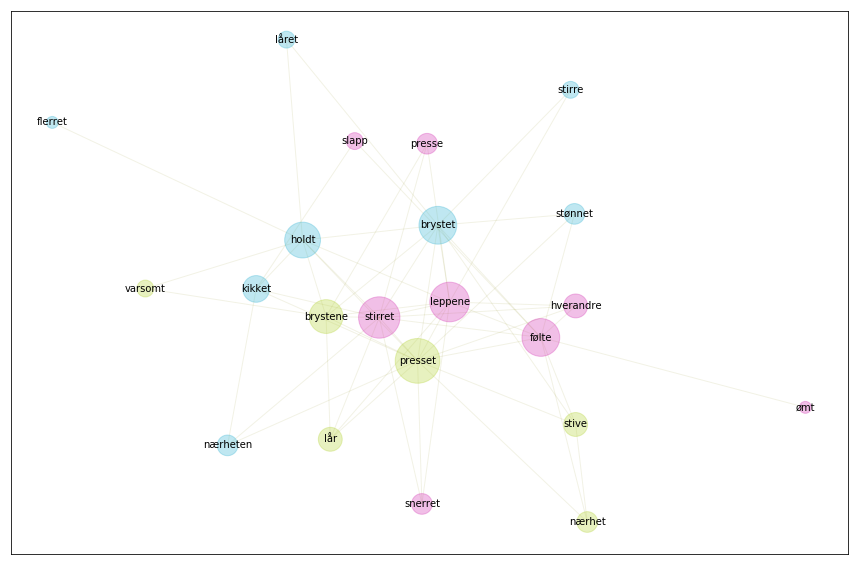

In [17]:
gnl.show_graph(G);

In [18]:
lemmet = nb.urn_coll('lemmet', urns)

In [19]:
urns[:3]

['2015090129001', '2011112308125', '2012021608164']

In [20]:
import requests
def normalize_corpus_dataframe(df):
    colsums = df.sum()
    for x in colsums.index:
        #print(x)
        df[x] = df[x].fillna(0)/colsums[x]
    return True

def urn_coll(word, urns=[], after=5, before=5, limit=1000):
    """Find collocations for a word in a set of books represented by URNs.
    Compute a collocation across the books, or pr. book. Both result in a one column dataframe representing
    the collocations.
    """
    
    if isinstance(urns[0], list):  # urns assumed to be list of list with urn-serial as first element
        urns = [u[0] for u in urns]
    
    r = requests.post("https://api.nb.no/ngram/urncoll", json={'word':word, 'urns':urns, 
                                                                   'after':after, 'before':before, 'limit':limit})
    res = pd.DataFrame.from_dict(r.json(), orient='index')
    if not res.empty:
        res = res.sort_values(by=res.columns[0], ascending = False)
    return res

def urn_coll_pr(word, urns=[], after=5, before=5, limit=1000):
        coll = dict()
        for urn in urns:
            cll = urn_coll(word, [urn], after=after, before=before, limit=limit)
            if not cll.empty:
                coll[urn] = cll
        colls = pd.DataFrame.from_dict(coll, orient='index' ).fillna(0)
        normalize_corpus_dataframe(colls)
        scoll = colls.mean(axis=1)
        res = pd.DataFrame(scoll.sort_values(ascending=False))


In [21]:
def collcomp(df_column, comp, exp = 1):
    """df_column is a column in a dataframe - a series, while comp is also a series object"""
    res = (df_column**exp/comp).sort_values(ascending=False)
    return res

In [22]:
len(nb.refine_urn(urns, {'words':[ 'musa'], 'limit':len(urns)}))

4

In [23]:
fitta = urn_coll('musa',urns=urns)
nb.normalize_corpus_dataframe(fitta)

True

In [ ]:
compftt

In [ ]:
colls = pd.DataFrame.from_dict(ilem, orient='index').transpose()

In [ ]:
for u in ilem:
    print(u, ilem[u][ilem[u] > 5])

In [ ]:
len(nb.refine_urn(urns, {'words':['lemmet'], 'limit':len(urns)}))

In [ ]:
len([x for x in urns if not lem[x].empty])

In [ ]:
for urn in urns:
    if urn in lem and lem[urn].empty:
        del lem[urn]

In [25]:
tot = pd.Series(nb.totals(top=50000))

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
tot = tot/tot.sum()

In [ ]:
compftt = collcomp(fitta[0], tot)

In [ ]:
nb.urn_coll??

In [ ]:
nb.normalize_corpus_dataframe(lemmet)

In [ ]:
lemmet.head()

In [ ]:
korpus_text = nb.get_corpus_text(urns)

In [ ]:
korpus_ord = korpus_text.sum(axis=1)

In [ ]:
korpus_ord = korpus_ord/korpus_ord.sum()

In [ ]:
korpus_ord

In [ ]:
collcomp(lemmet[0], tot, exp=1.0)[:20]

In [ ]:
collcomp(lemmet[0], korpus_ord, exp=1.0).head(50)

# Vekstdiagram

For vekstdiagram brukes kommandoen nb.vekstdiagram().plot(). Input til vekstdiagram er en URN sammen med en liste av ord. 

[[2013042408063, 'Croudace, Glynn', 1969, 'Riflen og spydet', 'Bladkompaniet', 'nob', 'eng']]


C:\Users\larsj\Documents\GitHub\xmining\nbtext.py:1022: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat(rammer)


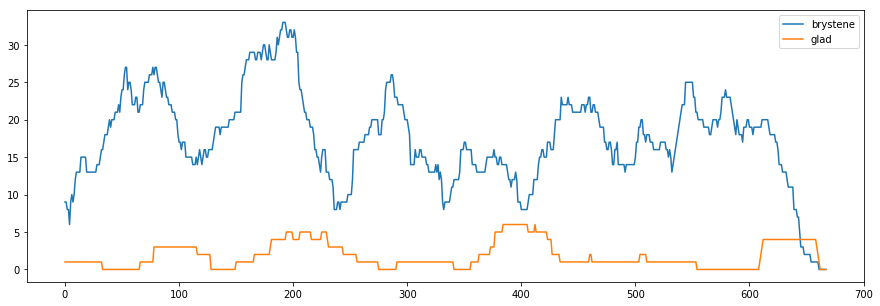

In [38]:
print(nb.metadata(urns[30]))
nb.plot_sammen_vekst(urns[30], [words,gladord]).plot(figsize=(15,5))

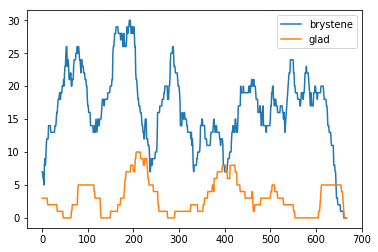

In [78]:
nb.plot_sammen_vekst(urns[30],[words, gladord]).plot()